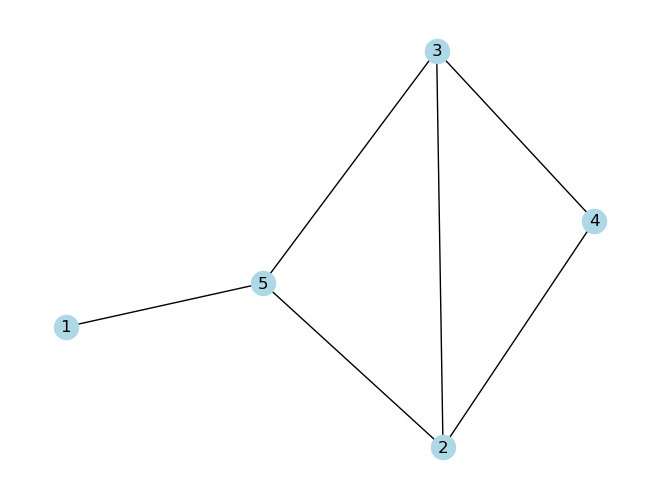

population: [[1, 2, 3, 4, 5], [2, 1, 3, 4, 5], [5, 2, 3, 4, 1]]

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
13
{2: 0, 1: 1, 3: 2, 4: 3, 5: 4}
15
{5: 0, 2: 1, 3: 2, 4: 3, 1: 4}
11
best chromosome: [5, 2, 3, 4, 1]
worst chromosome: [2, 1, 3, 4, 5]
mutated: [5, 1, 4, 3, 2]

population: [[1, 2, 3, 4, 5], [5, 1, 4, 3, 2], [5, 2, 3, 4, 1]]

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
13
{5: 0, 1: 1, 4: 2, 3: 3, 2: 4}
12
{5: 0, 2: 1, 3: 2, 4: 3, 1: 4}
11
best chromosome: [5, 2, 3, 4, 1]
worst chromosome: [1, 2, 3, 4, 5]
mutated: [5, 2, 1, 4, 3]

population: [[5, 2, 1, 4, 3], [5, 1, 4, 3, 2], [5, 2, 3, 4, 1]]

{5: 0, 2: 1, 1: 2, 4: 3, 3: 4}
13
{5: 0, 1: 1, 4: 2, 3: 3, 2: 4}
12
{5: 0, 2: 1, 3: 2, 4: 3, 1: 4}
11
best chromosome: [5, 2, 3, 4, 1]
worst chromosome: [5, 2, 1, 4, 3]
mutated: [5, 2, 3, 1, 4]

population: [[5, 2, 3, 1, 4], [5, 1, 4, 3, 2], [5, 2, 3, 4, 1]]

{5: 0, 2: 1, 3: 2, 1: 3, 4: 4}
12
{5: 0, 1: 1, 4: 2, 3: 3, 2: 4}
12
{5: 0, 2: 1, 3: 2, 4: 3, 1: 4}
11
best chromosome: [5, 2, 3, 4, 1]
worst chromosome: [5

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

class Chromosome:
    def __init__(self, gens=None):
        if (gens):
            self.gens = gens
        else:
            self.gens = [1,2,3,4,5]
            
    def __str__(self):
        return f'{self.gens}'
        
    def __repr__(self):
        return f'{self.gens}'

    def __getitem__(self,index):
        return self.gens[index]

    def __len__(self):
        return len(self.gens)

    def mutate(self,k):
        return self.gens[:k] + self.gens[k:][::-1]
        
class Population:
    
    def __init__(self,size=3, gens=[]):
        self.size = size
        self.population = [Chromosome(None if not gens else gens[i]) for i in range(self.size)]

    def __str__(self):
        return str(self.population)

    def __getitem__(self,index):
        return self.population[index]

    def replace_in_position(self,position,new_chromosome):
        self.population[position] = new_chromosome
        
class GeneticAlgorithm:
    
    def __init__(self,аdjacency_matrix,generations=4,population_size=3,gens=[[1,2,3,4,5],[2,1,3,4,5],[5,2,3,4,1]]):
        self.generations = generations
        self.аdjacency_matrix = аdjacency_matrix
        self.population_size = population_size
        self.gens = gens
        self.L = []
    def get_best_worst_chromos(self):
        arr = []
        for chromo in self.population:
            L = 0
            n = len(chromo)
            pos = {node: i for i, node in enumerate(chromo)}
            print(pos)
            for i in range (n):
                for j in range (i+1,n):
                    if (self.аdjacency_matrix[i][j] == 1):
                        L += abs(pos[i + 1] - pos[j + 1])
            print(L)
            arr.append(L)
        self.L = arr
        mi = self.L.index(min(self.L))
        worst = len(self.L) - 1 - self.L[::-1].index(max(self.L))
        return self.population[mi],self.population[worst], worst

    def draw_graph(self):
        G = nx.Graph()
        n = len(self.аdjacency_matrix)
        for i in range(n):
            for j in range(n):
                if self.аdjacency_matrix[i][j] == 1:
                    G.add_edge(i+1, j+1)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue')
        plt.show()
    
    def run(self):
        self.draw_graph()
        self.population = Population(size = self.population_size,gens=self.gens)
        for generation in range(self.generations):
            print(f'population: {self.population}\n')
            best_chromo, worst_chromo, worst_index = self.get_best_worst_chromos()
            print(f'best chromosome: {best_chromo}\nworst chromosome: {worst_chromo}')
            mutated = Chromosome(gens=best_chromo.mutate(generation+1))
            print(f'mutated: {mutated}\n')
            self.population.replace_in_position(worst_index,mutated)

matrix = [[0,0,0,0,1],
          [0,0,1,1,1],
          [0,1,0,1,1],
          [0,1,1,0,0],
          [1,1,1,0,0]]
gen = GeneticAlgorithm(matrix)
gen.run()
print(f'minL: {min(gen.L)}')